In [1]:
import re
import tweepy          # To consume Twitter's API
from tweepy import OAuthHandler
from textblob import TextBlob
import pandas as pd    # To handle data
import numpy as np     # For number computing
import matplotlib.pyplot as plt # For plotting and visualization:

In [2]:
config =pd.read_excel("api.xlsx") #acces the consume and access keys in ms excel

In [3]:
config

In [4]:
#now extracting all the data from api.xlsx 
twitterApiKey=config['twitterApiKey'][0]
twitterApiSecret=config['twitterApiSecret'][0]
twitterApiAccessToken=config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret=config['twitterApiAccessTokenSecret'][0]

In [5]:
#The next step is creating an OAuthHandler instance. Into this we pass our consumer token and secret
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

In [6]:
#twitter account
twitterAccount ="@AnubhavMohanty_" 
#"@apurvahendi"

In [7]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                      screen_name=twitterAccount,
                      count=None,
                      since_id=None,
                      max_id=None,trim_user=True,exclude_replies=True,contributor_details=False,
                      include_entities=False).items(50);

In [8]:
df=pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities


In [9]:
df.head()

,Tweet
0,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...
1,True copies of Family Court’s order sheets in ...
2,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...
3,RT @sports_odisha: Paulus Lakra created a ramp...
4,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...


In [10]:
#remove all the regurlar expression
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)  #python remove anything that is not a letter or number
    txt = re.sub(r'#','',txt) #remove all the #
    txt = re.sub(r'RT : ','',txt)#remove all the retweet
    txt =re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)#remove all the url
    return txt

In [11]:
df['Tweet']=df['Tweet'].apply(cleanUpTweet)#apply regular expression to clean up the tweet

# get the subjectivity and polarity of the tweet
#polarity-emotion expressed in a tweet(negetive(-1),neutral(0),positive(1))
#subjectivity-expressing one's own feelings,beliefs,opinion


In [12]:
#get subjectivity
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [13]:
#get polarity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [14]:
#apply both functions
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)


In [15]:
df.head(20)

,Tweet,Subjectivity,Polarity
0,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
1,True copies of Family Court’s order sheets in ...,0.575000,0.425000
2,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
3,Paulus Lakra created a rampage in Tamil Nadu a...,0.200000,0.400000
4,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
5,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
6,For everyone who are repeatedly advising me to...,0.498333,-0.065000
7,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
8,"People say, empowering a single gender ensures...",0.214286,-0.111607
9,ମୋର ସ' ବାନ୍ଧବ ପଦକ୍ଷେପ ଅନୁଯାୟୀ ADIP ଏବଂ RVY ଯୋଜ...,0.000000,0.000000


# lets remove all the empty tweet

In [16]:
df =df.drop(df[df['Tweet']==''].index)

In [17]:
df.head(20)

,Tweet,Subjectivity,Polarity
0,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
1,True copies of Family Court’s order sheets in ...,0.575000,0.425000
2,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
3,Paulus Lakra created a rampage in Tamil Nadu a...,0.200000,0.400000
4,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
5,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
6,For everyone who are repeatedly advising me to...,0.498333,-0.065000
7,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000
8,"People say, empowering a single gender ensures...",0.214286,-0.111607
9,ମୋର ସ' ବାନ୍ଧବ ପଦକ୍ଷେପ ଅନୁଯାୟୀ ADIP ଏବଂ RVY ଯୋଜ...,0.000000,0.000000


# text Analysis

In [18]:
#text anlysis with emoji expression
def getTextAnalysis(a):
    if a<0:
        return "\N{angry face}"
    elif a==0:
        return "\N{slightly smiling face}"
    else:
        return "\U0001F600"
    

In [19]:
#text Score in terms of Word
def getTextAnalysisWord(a):
    if a<0:
        return "Negetive"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [20]:
#applying gettextanalysisword function into Polarity dataframe
df['Score']=df['Polarity'].apply(getTextAnalysisWord)

In [21]:
#Now lets apply the Function o Polarity DataFrame
df['ScoreEmoji']=df['Polarity'].apply(getTextAnalysis)

In [22]:
df.head(200)

,Tweet,Subjectivity,Polarity,Score,ScoreEmoji
0,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000,Positive,😀
1,True copies of Family Court’s order sheets in ...,0.575000,0.425000,Positive,😀
2,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000,Positive,😀
3,Paulus Lakra created a rampage in Tamil Nadu a...,0.200000,0.400000,Positive,😀
4,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000,Positive,😀
5,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000,Positive,😀
6,For everyone who are repeatedly advising me to...,0.498333,-0.065000,Negetive,😠
7,ଜୟ ମହାପ୍ରଭୁ ଶ୍ରୀ ଜଗନ୍ନାଥ🙏🏻\nजय महाप्रभु श्री ज...,0.500000,0.500000,Positive,😀
8,"People say, empowering a single gender ensures...",0.214286,-0.111607,Negetive,😠
9,ମୋର ସ' ବାନ୍ଧବ ପଦକ୍ଷେପ ଅନୁଯାୟୀ ADIP ଏବଂ RVY ଯୋଜ...,0.000000,0.000000,Neutral,🙂


In [23]:
#positive tweet %
positive =df[df['Score']=='Positive']
print(str(positive.shape[0]/(df.shape[0])*100)+"% of Positive Tweets")
pospt=positive.shape[0]/df.shape[0]*100

57.99999999999999% of Positive Tweets


In [24]:
#Negetive Tweet %
negetive =df[df['Score']=='Negetive']
print(str(negetive.shape[0]/(df.shape[0])*100)+"% of Negetive Tweets")
posne=negetive.shape[0]/df.shape[0]*100

14.000000000000002% of Negetive Tweets


In [25]:
# %of Neutral tweet
Neutral =df[df['Score']=='Neutral']
print(str(Neutral.shape[0]/(df.shape[0])*100)+"% of Neutral Tweets")
posnu=Neutral.shape[0]/df.shape[0]*100

28.000000000000004% of Neutral Tweets


In [26]:
Total=pospt+posne+posnu
print(Total)  

100.0


# DATA VISUALIZATION

In [27]:
yval = [pospt, posne, posnu]
xval = ['Posititve', 'Negative', 'Neutral']

In [28]:
#data visulization

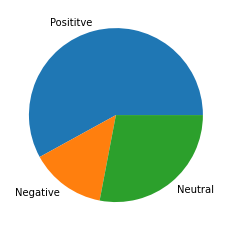

In [29]:
plt.pie(yval, labels = xval)
plt.show()

<BarContainer object of 3 artists>

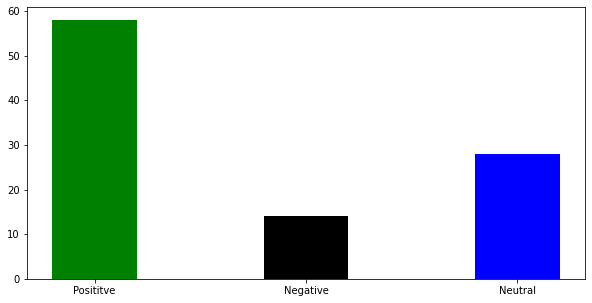

In [30]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(xval, yval, color=['green', 'black', 'blue'], width = 0.4)